In [1]:
import pandas
customer = pandas.read_csv("http://modcom.co.ke/bigdatasept/datasets/general.csv")
customer

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [2]:
# we cluster using only the 3 columns
customer_subset = customer[['BALANCE','BALANCE_FREQUENCY','PURCHASES']]  # Numeric/Continous
customer_subset


array = customer_subset.values
X = array[:,0:5]


from sklearn.cluster import KMeans
model = KMeans(n_clusters=12, random_state=42)
model.fit(X)

# Where are the five clusters?
centronoids = model.cluster_centers_
clusters = pandas.DataFrame(centronoids, columns=['BALANCE','BALANCE_FREQUENCY','PURCHASES'])
print(clusters)

#  get the newly created column for cluster labels
customer_subset['Customer_ref']  = model.labels_
customer_subset = customer_subset[customer_subset['Customer_ref'] == 2]
print(customer_subset)

        BALANCE  BALANCE_FREQUENCY     PURCHASES
0    167.209503           0.727031    366.829074
1   3051.726351           0.980909    429.837065
2   2512.977557           0.982375   9836.151122
3    692.690675           0.934261   1993.619110
4   9573.180416           1.000000    766.571801
5   1356.312635           0.964789    264.945237
6   5684.596253           0.989788    399.228992
7   6287.503443           1.000000  38286.240000
8   9974.433886           1.000000   7290.733673
9   1112.148963           0.969950   4611.498892
10  4557.600922           0.992168   3408.589824
11  5020.989742           0.924599  23328.064706
          BALANCE  BALANCE_FREQUENCY  PURCHASES  Customer_ref
125   2392.917738           1.000000   12462.44             2
158   2765.748281           1.000000    7283.31             2
171    975.942008           1.000000   10221.35             2
204   4559.779234           1.000000   10848.50             2
229   2723.369217           0.909091   10410.49      

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


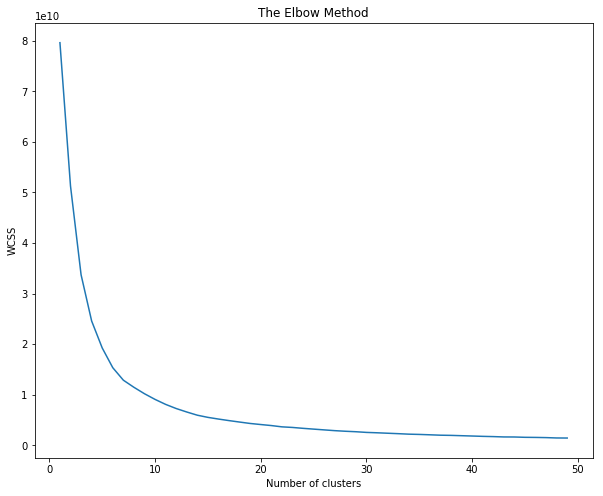

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 50):
     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()